In [1]:
import pandas



In [ ]:
# 1. Import the dataset and explore basic info (nulls, data types).
import pandas as pd
df=pd.read_csv(r"C:/Databases/Titanic-Dataset.csv")
print(df.info())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

In [12]:
# 2. Handle missing values using mean/median/imputation.
import pandas as pd
df=pd.read_csv(r"C:/Databases/Titanic-Dataset.csv")
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [21]:
# 3. Convert categorical features into numerical using encoding.
# Convert 'Sex' column to numerical values (Label Encoding)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
print(df.columns)
print(df.info())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          0 non-null      float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked_Q   891 non-null    bool   
 12  Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(3), int64(5), object(3)
memory usage: 78.4+ KB
None


In [ ]:
# 4. Normalize/standardize the numerical features.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

nums_col=['Age', 'Fare', 'SibSp', 'Parch']
df[nums_col] = df[nums_col].fillna(df[nums_col].mean())

for col in nums_col:
    mean = df[col].mean()
    std = df[col].std()
    df[col] = (df[col] - mean) / std


print(df[nums_col].describe())


                Age          Fare         SibSp       Parch
count  5.770000e+02  5.770000e+02  5.770000e+02  577.000000
mean  -3.078608e-17 -1.231443e-17 -1.231443e-17    0.999133
std    1.000000e+00  1.000000e+00  1.000000e+00    0.000000
min   -2.905022e+00 -1.184019e+00 -4.478464e-01    0.999133
25%   -6.741883e-01 -5.672744e-01 -4.478464e-01    0.999133
50%   -5.041941e-03 -4.968743e-01 -4.478464e-01    0.999133
75%    3.238160e-01  7.326715e-02 -4.478464e-01    0.999133
max    2.848180e+00  3.668629e+00  4.046194e+00    0.999133


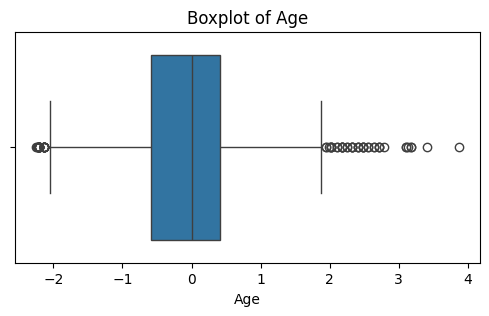

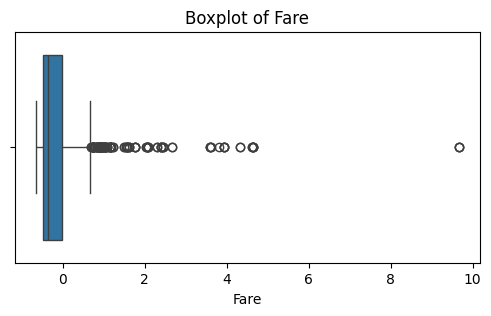

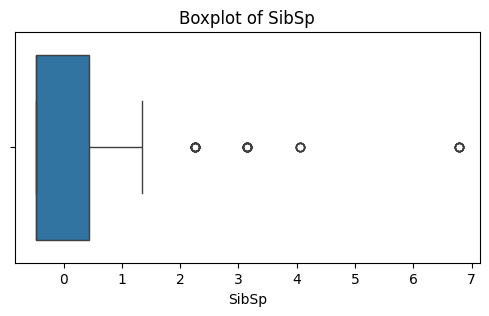

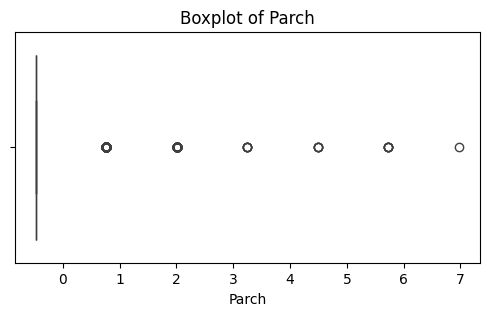

Data shape after outlier removal: (577, 13)


In [26]:
# 5.Visualize outliers using boxplots and remove them.
for col in nums_col:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for col in nums_col:
    df = remove_outliers_iqr(df, col)

print(f"Data shape after outlier removal: {df.shape}")
